In [354]:
import matplotlib.pyplot as plt
import numpy as np
import random

def initialize_weights():
    # Initialize Weights
    w = []

    for i in range(3):
        w.append(random.random()*2 - 1)
        
    return w

def visualize_guess(w):

    #Data to Classify

    plt.axis([-1, 1, -1, 1])
    plt.plot(0, 0, 'r*')
    plt.plot(1, 0, 'r*')
    plt.plot(0, 1, 'r*')
    plt.plot(1, 1, 'go')

    # Target Decision Line
    # w0 < 0
    # w1 < -w0
    # w2 < -w0
    # w1 + w2 >= -w0
    
    px1 = -1
    m = -1/1 # -w1/w2
    b = 1.1/1 # -w0/w2
    py1 = m*px1 + b
    px2 = 1
    py2 = m*px2 + b

    plt.plot([px1, px2], [py1, py2], 'b')


    # Guess
    m = -w[1]/w[2]
    b = -w[0]/w[2]
    py1 = m*px1 + b
    px2 = 1
    py2 = m*px2 + b

    plt.plot([px1, px2], [py1, py2], 'r')

    plt.show()

def truth_table():

    #Truth Table

    x0 = np.array([(1, 1, 1, 1)])
    x1 = np.array([(1, 1, 0, 0)])
    x2 = np.array([(1, 0, 1, 0)])
    y = np.array([(1, 0, 0, 0)])
    truth = np.concatenate((x1.T, x2.T, y.T), axis = 1)
    #print("\nTruth Table for AND:\n {}".format(truth))
    return [x0, x1, x2]

def activation_function(w, x0, x1, x2):
    # Weight Check to Truth Table
    #print("w: {},\n x0: {},\n x1: {},\n x2: {}\n".format(w,x0,x1,x2))
    x = np.concatenate((x0.T, x1.T, x2.T),axis = 1)
    #print(x)
    #print('\nWeights:\n')
    #print(w)
    #print('\n Activation Function: \n')
    g = np.inner(np.array(w),x)
    
    #print(g.tolist()[0])
    #print('\nOutput:\n')
  
    return [x, g]

def alter_weights(learning_rate,w,x, index, sign):

    # New Update Weights 09/11/2020
    #print('\nSign: {}\n'.format(sign))
    learning_array = np.multiply(x,learning_rate)
    #print("LOOOOOK")
    #print(learning_array[index])
    #print(np.array(w))
    if sign >= 0:
        w = np.add(np.array(w),learning_array[index])
    elif sign < 0:
        w = np.subtract(np.array(w),learning_array[index])
    return w
    
def find_mismatch(y, logic_array_target, logic_array_guess):
    for i in range(len(logic_array_guess)):
        #print(logic_array_guess)
       
        #print("Logic array ==: {}\n".format))
        
        if logic_array_guess[i] != logic_array_target[i]:
            #print(logic_array_target)
            #print("Logic array guess: {}\n".format(logic_array_guess[i]))
            #print("Logic array target: {}\n".format(logic_array_target[i]))
            return [i, logic_array_target[i]]
    
def pocket_algorithm(w, g, logic_array_target, learning_rate, x, x_list, y, time):
    pocket_w = w
   
    failed_weights = []
    for i in range(time):
        #print("\nACT FUNCTION: ")
        #print(g)
        #print("\n")
        count = i
        logic_array_guess = []
        logic_array_guess = list(map(lambda x: np.sign(x), g))
        #print(logic_array_guess)
        #print(logic_array_target)
        if logic_array_guess == logic_array_target:
            #print("About to break")
            break
        
        else:
            #print("\nRUNNING ELSE\n")
            temp = find_mismatch(y, logic_array_target, logic_array_guess)
            if temp == None:
                continue
                
            truth_table_index = temp[0]
            sign = temp[1]
            #print("TEMP EXISTS")
            test_w = alter_weights(learning_rate, pocket_w, x, truth_table_index, sign)
            #print("W, then test W")
            #print(pocket_w)
            #print(test_w)
            test_g = activation_function(test_w, x_list[0], x_list[1], x_list[2])[1]
            #print("G then test G")
            #print(g)
            #print(test_g)
            #print(test_w) 
            logic_array_test = list(map(lambda x: np.sign(x), test_g))
            #print(logic_array_test)
            test_difference = np.subtract(np.array(logic_array_test), np.array(logic_array_target)).tolist()
            pocket_difference = np.subtract(np.array(logic_array_guess), np.array(logic_array_target)).tolist()
            #print(test_difference)
            #print(pocket_difference)
            #print(sum(pocket_difference))
            #print(sum(test_difference))
            if abs(sum(pocket_difference)) > abs(sum(test_difference)):
                pocket_w = test_w
                #print("NEW POCKET")
                g = activation_function(pocket_w, x_list[0], x_list[1], x_list[2])[1]
                learning_rate /= 2
        learning_rate *= (random.random() * 2)
        #print(logic_array_guess)
    print(i)            
    return pocket_w

9999
[-0.19599577  0.5481317  -0.43159806]


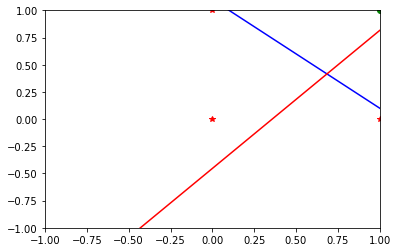

In [449]:
#learning_rate = 0.1
logic_array_target = [1, -1, -1, -1]
time = 10000
output = [0, 0, 0, 1]
w = initialize_weights()



x_list = truth_table()

[x, g] = activation_function(w, x_list[0], x_list[1], x_list[2])
#print("x then g")
#print(x)
#print(g)
#alter_weights(learning_rate, w, x)
w = pocket_algorithm(w, g, logic_array_target, learning_rate, x, x_list, output, time)

print(w)

visualize_guess(w)

In [137]:
logic_array_guess = list(map(lambda x: np.sign(x), g))
logic_array_guess[0].tolist()

[1.0, -1.0, -1.0, -1.0]